# HW3 Solutions

## Problem 1.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

rawData = pd.read_csv('moviedata.csv')
rawData = rawData.dropna()
rawData.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
5  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
5                738.0  English      USA           PG-13  263700000.0   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
5      2012.0                  632.0        6.6          2.35   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
5                24000  

[5 rows x 28 columns]

In [3]:
excellent = rawData.imdb_score >= 8
good = (rawData.imdb_score < 8) & (rawData.imdb_score >= 6)
average = (rawData.imdb_score < 6) & (rawData.imdb_score >= 4)
mediocre = (rawData.imdb_score < 4) & (rawData.imdb_score >= 2)
bad = rawData.imdb_score < 2


rawData.loc[excellent, 'imdb_labels'] = 'excellent'
rawData.loc[good, 'imdb_labels'] = 'good'
rawData.loc[average, 'imdb_labels'] = 'average'
rawData.loc[mediocre, 'imdb_labels'] = 'mediocre'
rawData.loc[bad, 'imdb_labels'] = 'bad'

rawData.groupby(['imdb_labels']).size()

imdb_labels
average       960
bad             3
excellent     212
good         2499
mediocre       82
dtype: int64

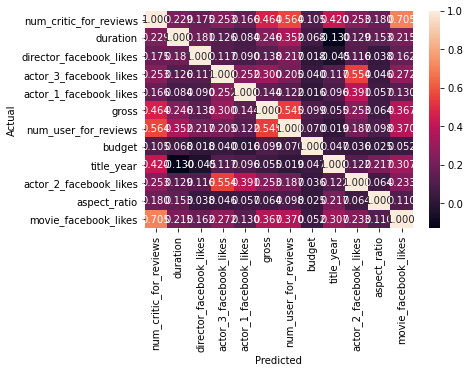

In [245]:
numCols=['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio', 'movie_facebook_likes']

x = rawData[numCols]

sns.heatmap(x.corr(), annot=True, fmt=".3f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [150]:
#remove high colinear variables
filter=['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes',
       'aspect_ratio']

x = rawData[filter]
y = rawData['imdb_labels']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

cart = DecisionTreeClassifier()
cart.fit(x_train, y_train)

test_pred = cart.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))
print("confusion_matrix")
print(confusion_matrix(y_test, test_pred))

Accuracy: 0.6512866015971606
confusion_matrix
[[159   3 120   8]
 [  7  19  41   1]
 [139  34 550  17]
 [ 11   0  12   6]]


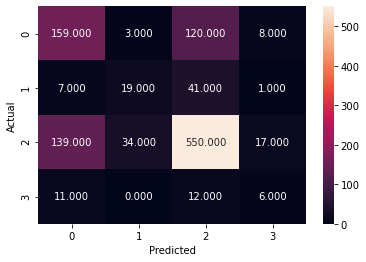

In [152]:
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt=".3f")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Problem 2.

For CART models the gini index is the probability of uncertanty for a decision. This is used to calculate the gini impurity, which is more usefull to use since that's what we're using to reduce the impurity of our final decision. Gini impurity is the probability that a decision might misclassifiy the outcome and is weighted by the number of occurences of that dicision. CART works by trying to reduce the gini impurity as much as possible. With the gini impurity you'll see that it slowly increases then jumps down as you go along the tree. The algorithm selects the lowest avaible impurity to start with as that's it best decision at the time. As the tree grows more nodes the impurity will graduly decrease until we are out of decisions to make or a previous decision's impurity is lower then any other avaible decision's.

In [168]:
from sklearn import tree

In [169]:
print(cart.tree_.impurity)

[0.48398145 0.53717148 0.56306504 ... 0.18836565 0.         0.        ]


## Problem 3.

In [264]:
from sklearn.cluster import KMeans

filter2 = ['num_critic_for_reviews', 'gross', 'num_user_for_reviews', 'movie_facebook_likes']
x = rawData[filter2]

kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

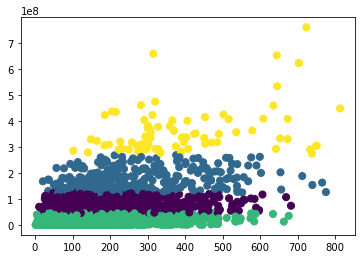

In [268]:
plt.scatter(x[filter2[0]][:], x[filter2[1]][:], c=y_kmeans, s=50, cmap='viridis')

## Problem 4.

In [261]:

centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black' s=200, alpha=0.5);
print(centers)

[[1.88978079e+02 7.42903311e+07 3.91520877e+02 1.13184113e+04]
 [2.68956268e+02 1.72925438e+08 6.96956268e+02 2.30243907e+04]
 [1.36050105e+02 1.59532050e+07 2.26150737e+02 5.34634905e+03]
 [4.03262500e+02 3.65516792e+08 1.42427500e+03 4.61875000e+04]]


In [273]:
print('Euclidean distances between each pair')
for i in range(0, len(centers)):
    for j in range(i+1, len(centers)):
        dist = 0
        for k in range(0, len(centers[i])):
            dist += (centers[i,k] - centers[j,k])**2
        dist = dist**0.5
        print('Distance from', i, 'to', j, ':', dist)
    

Euclidean distances between each pair
Distance from 0 to 1 : 98635107.71611638
Distance from 0 to 2 : 58337126.37285349
Distance from 0 to 3 : 291226463.4474968
Distance from 1 to 2 : 156972234.08409396
Distance from 1 to 3 : 192591355.73147842
Distance from 2 to 3 : 349563589.8130135


In [274]:
print('Manhattan distances between each pair')
for i in range(0, len(centers)):
    for j in range(i+1, len(centers)):
        dist = 0
        for k in range(0, len(centers[i])):
            dist += abs(centers[i,k] - centers[j,k])
        print('Distance from', i, 'to', j, ':', dist)

Manhattan distances between each pair
Distance from 0 to 1 : 98647198.41395769
Distance from 0 to 2 : 58343316.427245356
Distance from 0 to 3 : 291262577.4853865
Distance from 1 to 2 : 156990514.84120303
Distance from 1 to 3 : 192615379.0714288
Distance from 2 to 3 : 349605893.91263187
